In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# pip install -e ./modeling_package

In [3]:
# pip install statsmodels

In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from standard_modeling.feature_selection import FeatureSelector

# Generate a synthetic dataset
X, y = make_classification(n_samples=500, n_features=10, n_informative=5, random_state=42)
feature_names = [f'feature_{i}' for i in range(X.shape[1])]
X = pd.DataFrame(X, columns=feature_names)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the FeatureSelector
selector = FeatureSelector(cv=5, scoring='accuracy', vif_threshold=5, score_threshold=0.01, cross_val_kwargs=dict(random_state=42))

# Use Logistic Regression as the model
model = LogisticRegression(max_iter=1000)

# Perform forward feature selection
selection_result = selector.forward_feature_selection(model, X_train, y_train)

# Display the results
print("Selected Features:", selection_result.selected_features)
print("Feature Scores:", selection_result.scores)
print("VIF Values:", selection_result.vif_values)
print("Final Model Score:", selection_result.final_score)
selection_result.get_summary()


Selected Features: ['feature_0', 'feature_5', 'feature_1']
Feature Scores: {'feature_0': 0.7424999999999999, 'feature_5': 0.7975, 'feature_1': 0.8450000000000001}
VIF Values: {'feature_0': 1, 'feature_5': 1.0308429034979696, 'feature_1': 1.6006532715073192}
Final Model Score: 0.8525


,Feature,Score,VIF
0,feature_0,0.7425,1.000000
1,feature_5,0.7975,1.030843
2,feature_1,0.8450,1.600653


[Node(name=A, params=['param1', 'param2']), Node(name=C, params=['param4']), Node(name=B, params=['param3'])]


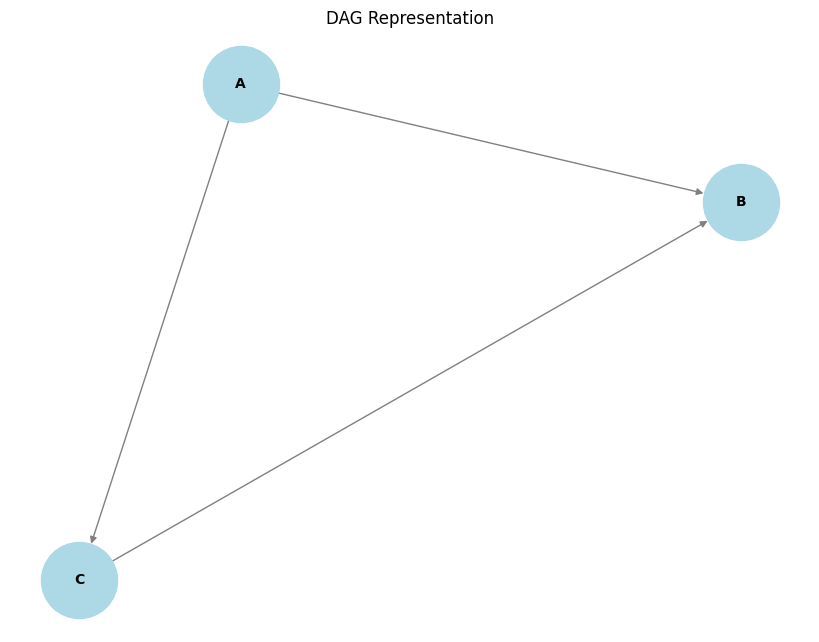

In [6]:
from standard_modeling.feature_selection import Node, DAG

# Example Usage
node_a = Node("A", ["param1", "param2"])
node_b = Node("B", ["param3"])
node_c = Node("C", ["param4"])

nodes = [node_b, node_c, node_a]
edges = [("A", "B"), ("A", "C"), ("C", "B")]  # A -> B, A -> C

dag = DAG(nodes, edges)
dag.plot()  # Plot the DAG
print(dag.get_topological_order())  # Prints DAG structure

In [30]:
node_a = Node("A")
node_b = Node("B")
node_c = Node("C")
node_d = Node("D")

nodes = [node_b, node_c, node_a, node_d]
edges = [("B", "D"), ("C", "D"), ("C", "A")]

dag = DAG(nodes, edges)
order = [node.name for node in dag.get_topological_order()]
order

['B', 'C', 'A', 'D']